### 1. Import and load

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

covid_totals = pd.read_csv('data/covidtotals720.csv', parse_dates=['lastdate'])
covid_totals.set_index('iso_code', inplace=True)

### 2. Let's remind ourselves of the structure of the data:

In [19]:
covid_totals.shape

(209, 12)

In [20]:
covid_totals.sample(1, random_state=1)

,lastdate,location,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds,region
iso_code,,,,,,,,,,,,
COG,2020-07-12,Congo,2028.0,47.0,367.518,8.517,5518092.0,15.405,19.0,4881.406,NaN,Central Africa


In [21]:
covid_totals.dtypes

lastdate           datetime64[ns]
location                   object
total_cases               float64
total_deaths              float64
total_cases_pm            float64
total_deaths_pm           float64
population                float64
pop_density               float64
median_age                float64
gdp_per_capita            float64
hosp_beds                 float64
region                     object
dtype: object

### 3. Get the descriptive stats on the COVID totals and demographic columns:

In [22]:
covid_totals.describe()

,lastdate,total_cases,total_deaths,total_cases_pm,total_deaths_pm,population,pop_density,median_age,gdp_per_capita,hosp_beds
count,209,2.090000e+02,209.000000,209.000000,209.000000,2.090000e+02,198.000000,185.000000,182.000000,164.000000
mean,2020-07-11 23:53:06.602870784,6.075741e+04,2702.952153,2297.022144,73.636522,3.708365e+07,328.162591,30.551351,19284.983786,3.012671
min,2020-07-11 00:00:00,3.000000e+00,0.000000,1.229000,0.000000,8.090000e+02,0.137000,15.100000,661.240000,0.100000
25%,2020-07-12 00:00:00,3.420000e+02,9.000000,202.834000,2.809000,9.880020e+05,37.416000,22.200000,4485.329000,1.300000
50%,2020-07-12 00:00:00,2.820000e+03,53.000000,868.866000,15.216000,6.871287e+06,87.250000,29.900000,13031.526500,2.358500
75%,2020-07-12 00:00:00,2.561100e+04,386.000000,2784.865000,58.374000,2.637828e+07,213.535500,38.700000,27882.133750,3.895750
max,2020-07-12 00:00:00,3.247684e+06,134814.000000,35795.159000,1237.551000,1.439324e+09,19347.500000,48.200000,116935.600000,13.800000
std,NaN,2.724401e+05,11894.963052,4039.840203,156.341672,1.428367e+08,1507.857139,9.097820,19687.706344,2.464917


### 4. Take a closer look at the distribution of values for the cases and deaths columns.

Use NumPy's `arange` method to pass a list of floats from 0 to 1.0 to the quantile method of the DataFrame:

In [23]:
tot_vars = ['total_cases', 'total_deaths', 'total_cases_pm', 'total_deaths_pm']

covid_totals[tot_vars].quantile(np.arange(0.0, 1.1, 0.1))

,total_cases,total_deaths,total_cases_pm,total_deaths_pm
0.0,3.0,0.0,1.2290,0.0000
0.1,63.6,0.0,63.3298,0.0000
0.2,231.2,3.6,144.8176,1.2358
0.3,721.6,14.4,261.5104,3.7636
0.4,1324.4,28.4,378.7776,7.0218
0.5,2820.0,53.0,868.8660,15.2160
0.6,6695.6,116.6,1398.3306,29.3736
0.7,14316.4,279.0,2307.9256,47.7320
0.8,40245.4,885.2,3492.3088,76.2842
0.9,98632.8,4719.0,5407.6504,201.4248


### 5. View the distribution of total cases:

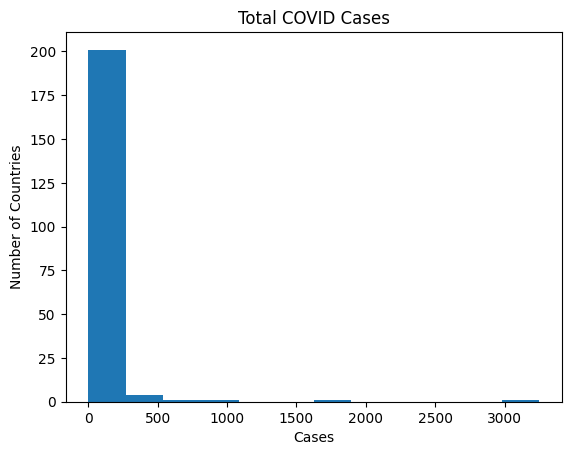

In [24]:
plt.hist(covid_totals['total_cases']/1000, bins=12)
plt.title('Total COVID Cases')
plt.xlabel('Cases')
plt.ylabel('Number of Countries')
plt.show()